# TS5: Primeros pasitos en la estimación espectral
En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral. Les dejo una explicación en el

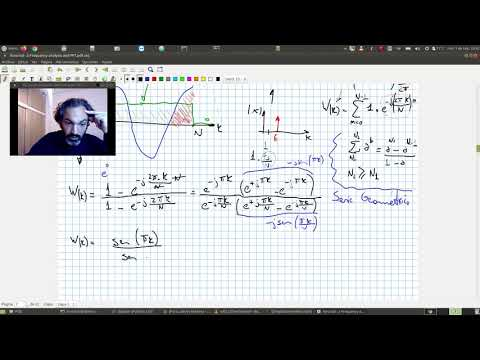

In [17]:
from IPython.display import YouTubeVideo
YouTubeVideo('dKXeOgiv1HY', width=800, height=300)

Pueden revisar la bibliografía para más detalles, este tema en el Lyons figura como spectral leakage.

Luego, haremos el siguiente experimento:

+ Senoidal de frecuencia $f_0=k_0∗\frac{f_S}{N}=k_0.\vartriangle{f}$
+ ***Potencia normalizada***, es decir energía (o varianza) unitaria

Se pide:

a) Sea $k_0=[\frac{N}{4},\frac{N}{4}+0.25,\frac{N}{4}+0.5]$. Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δf. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

b) Verificar la potencia unitaria de cada PSD. En base a la teoría estudiada, ¿cuál es la razón por la cual una señal senoidal tiene un espectro (PSD) tan diferente respecto a otra de muy pocos Hertz de diferencia?

Bonus:

💎 Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar $\vartriangle f$ de forma ficticia. Probar agregando un vector de $9.N$ ceros al final. Discuta los resultados obtenidos.

## Solucion propuesta:
### Modulos utilizados: 

In [18]:
from tools_psd import signal_generator
import numpy as np
import matplotlib.pyplot as plt

### Declaracion de variables

In [19]:
fs = 1000
nn = 1000
N = 1 + 0
ko = nn/4
ff = [ko*(fs/nn), ko*(fs/nn) + 0.25 ,ko*(fs/nn) + 0.5]
vmax = 1
dc = 0
ph1 = 0
tipo_sg = 'senoidal'
ov_s=1

s=[None]*len(ff)
x_fft=[]
f=[]
colores = ['red', 'blue', 'orange', 'green', 'silver', 'yellow', 'gray', 'violet', 'pink', 'brown', 'purple', 'gold']

### Estimacion espectral:

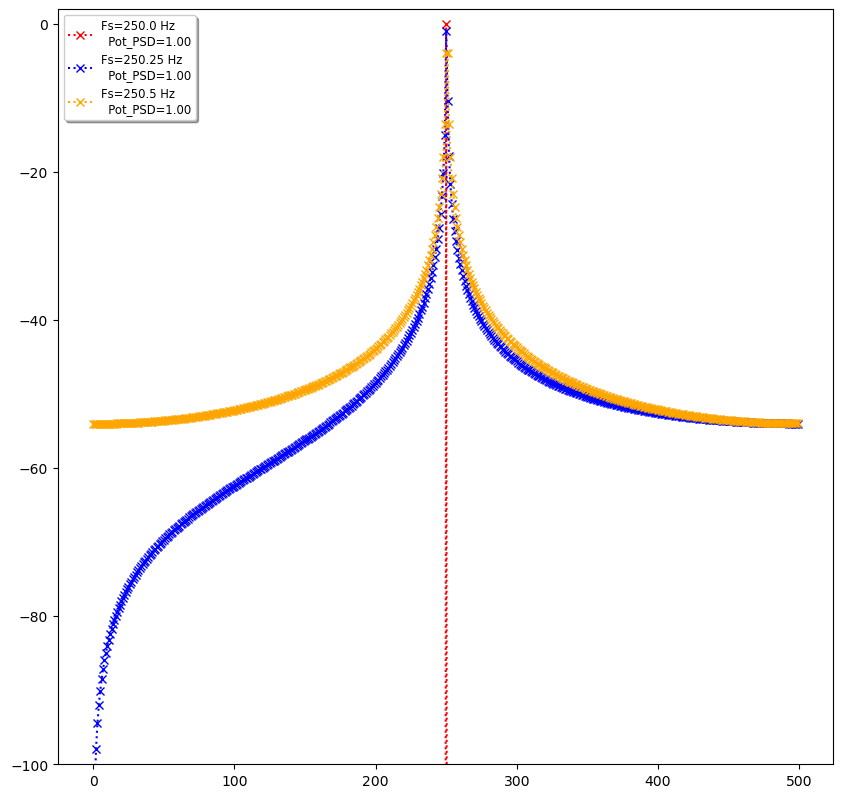

In [20]:
for i in range(0, len(ff)):
    tt_os, xx_os, tsig, s[i] = signal_generator(vmax, dc, ff[i], ph1, nn, fs, tipo_sg, over_sampling=ov_s)
    
    pot_S = np.sum(s[i]**2)*(1/nn)          #Potencia de la señal
    s[i] = s[i]/np.sqrt(pot_S)              #Señal normalizada en potencia Psn = 1
    
    x_fft.append(np.fft.fft(s[i].reshape(nn), axis=0)*( 1 / nn))   #Transformada discreta de Fourier de S
    f.append(np.fft.fftfreq(nn, d=1/fs))    # Eje de frecuencias
    
    pot_dep = sum(np.abs(x_fft[i])**2)
    
    ######## para 0<F<fs/2 #######
    f[i] = f[i][:f[i].size//2]
    x_fft[i] = x_fft[i][:x_fft[i].size//2]
    ########################################
    
for i in range(0, len(ff)):   
    plt.figure(1, figsize=(10, 10), dpi=100)
    plt.plot(f[i], 10*np.log10(2*np.abs(x_fft[i])**2),'x:', color=colores[i], label=f'Fs={ff[i]} Hz\n  Pot_PSD={pot_dep:0.2f}')
    plt.ylim(-100, 2)
    plt.legend(loc='upper left', shadow=True, fontsize='small')

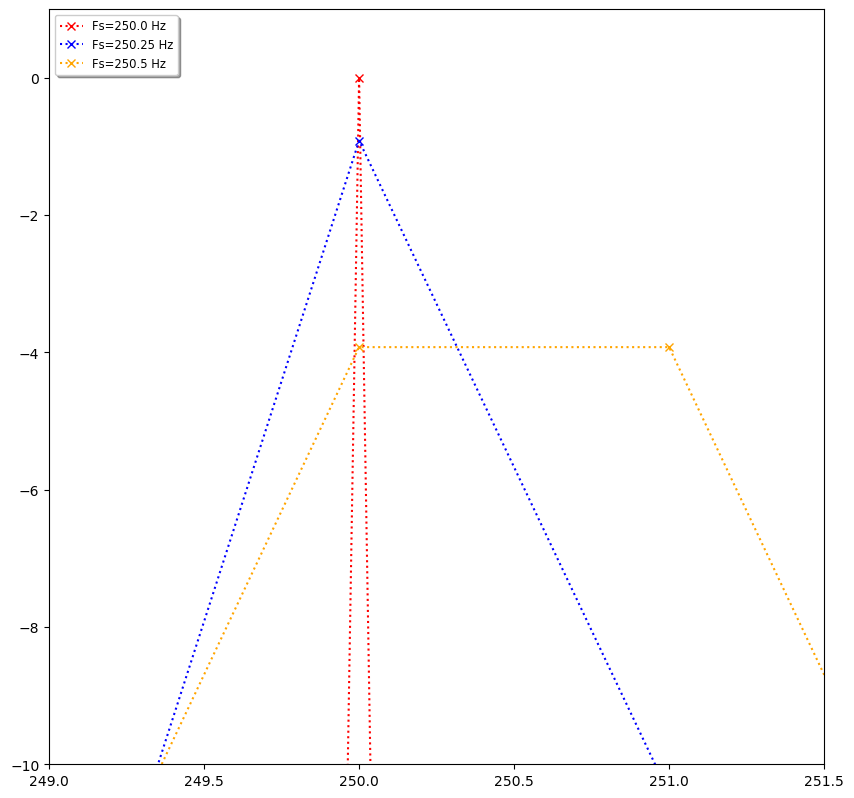

In [21]:
for i in range(0, len(ff)): 
    plt.figure(2, figsize=(10, 10), dpi=100)
    plt.plot(f[i], 10*np.log10(2*np.abs(x_fft[i])**2),'x:', color=colores[i], label=f'Fs={ff[i]} Hz')
    plt.xlim((fs/4)-1, (fs/4)+1.5)
    plt.ylim(-10, 1)
    plt.legend(loc='upper left', shadow=True, fontsize='small')

Como podemos observar las frecuencias que presentan desintonia, no tienen la delta en la frecuencia que les corresponde, esto se debe a que al estar esta delta convolucionada por un Kernel de Dirichtlet (el Kernel se 'monta' sobre la delta) y como solo podemos muestrar frecuencias multiplos de la resolucion espectral que en este caso es de 1Hz, los ceros que vamos a poder visualizar son los de las frecuencias enteras (en este caso la señal roja), pero para frecuencias no enteras se presentaran puntos que pertenecen al kernel de Dirichlet, esto es debido al corrimiento de los ceros.

#### Zero-padding:

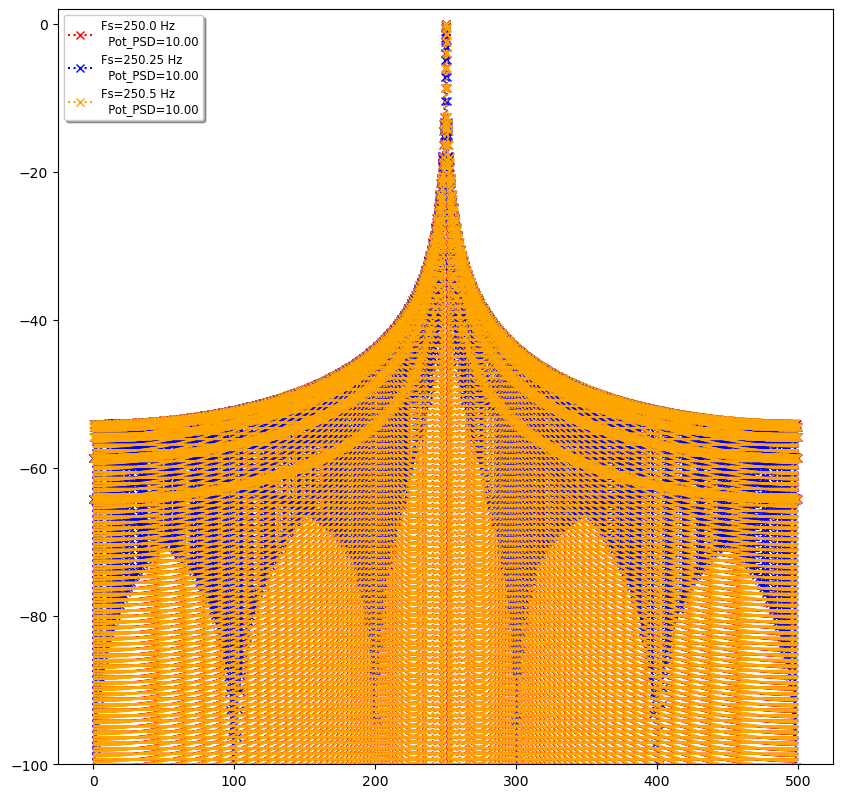

In [22]:
N = 1 + 9
nn_pad = N*nn
ko = nn_pad/4
ff = [ko*(fs/nn_pad), ko*(fs/nn_pad) + 0.25 ,ko*(fs/nn_pad) + 0.5]

s=[None]*len(ff)
s2=[None]*len(ff)
sn=[None]*len(ff)
x_fft=[]
f=[]
x_fft2=[]
f2=[]

for i in range(0, len(ff)):
    tt_os, xx_os, tsig, s[i] = signal_generator(vmax, dc, ff[i], ph1, nn, fs, tipo_sg, over_sampling=ov_s)
    
    pot_S = np.sum(s[i]**2)*(1/nn)          #Potencia de la señal
    s[i] = s[i]/np.sqrt(pot_S)              #Señal normalizada en potencia Psn = 1
    
    s2[i] = s[i].copy()                     #Copia superficial
    s2[i].resize(nn_pad)                    #Resize para generar el zero padding
    
    sn[i] = s2[i]*(nn_pad/nn)              #Señal normalizada por el kernel de Dirichtled
    
    x_fft.append(np.fft.fft(sn[i].reshape(nn_pad), axis=0)*( 1 / nn_pad))   #Transformada discreta de Fourier de S
    f.append(np.fft.fftfreq(nn_pad, d=1/fs))    # Eje de frecuencias
    
    pot_dep = sum(np.abs(x_fft[i])**2)
    
    ######## para 0<F<fs/2 #######
    f[i] = f[i][:f[i].size//2]
    x_fft[i] = x_fft[i][:x_fft[i].size//2]
    ########################################
    
for i in range(0, len(ff)):   
    plt.figure(1, figsize=(10, 10), dpi=100)
    plt.plot(f[i], 10*np.log10(2*np.abs(x_fft[i])**2),'x:', color=colores[i], label=f'Fs={ff[i]} Hz\n  Pot_PSD={pot_dep:0.2f}')
    plt.ylim(-100, 2)
    plt.legend(loc='upper left', shadow=True, fontsize='small')

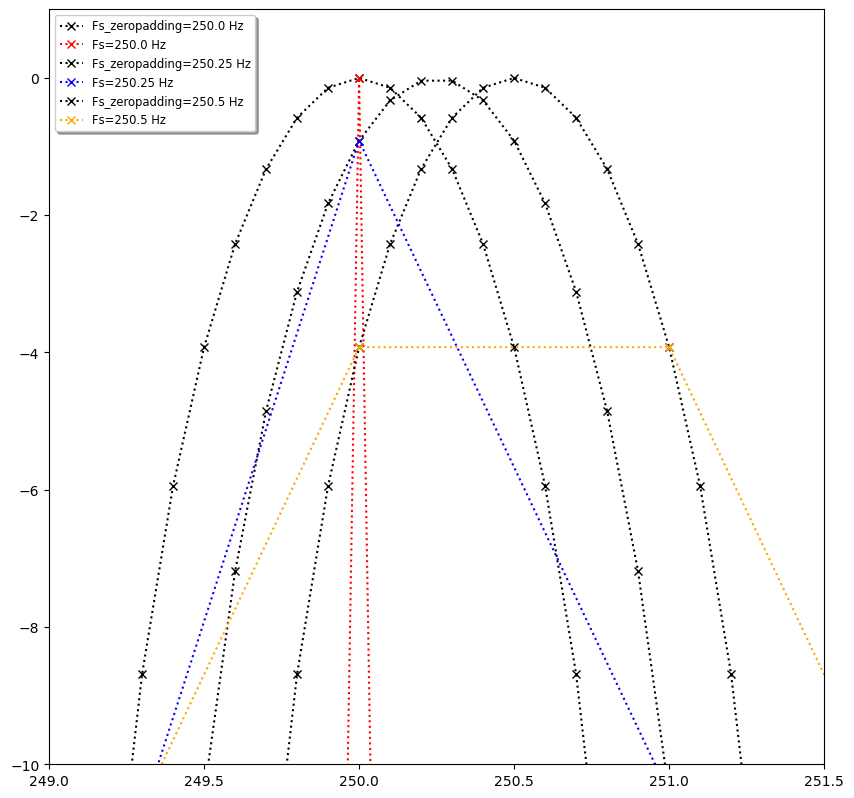

In [23]:
for i in range(0, len(ff)):
    x_fft2.append(np.fft.fft(s[i].reshape(nn), axis=0)*( 1 / nn))   #Transformada discreta de Fourier de S
    f2.append(np.fft.fftfreq(nn, d=1/fs))    # Eje de frecuencias
    plt.figure(3, figsize=(10, 10), dpi=100)
    plt.plot(f[i], 10*np.log10(2*np.abs(x_fft[i])**2),'x:', color='black', label=f'Fs_zeropadding={ff[i]} Hz')
    plt.plot(f2[i], 10*np.log10(2*np.abs(x_fft2[i])**2),'x:', color=colores[i], label=f'Fs={ff[i]} Hz')
    plt.xlim((fs/4)-1, (fs/4)+1.5)
    plt.ylim(-10, 1)
    plt.legend(loc='upper left', shadow=True, fontsize='small')

Este agregado de ceros produce que nuestra resolucion espectral se reduzca por lo que ahora podemos visualizar frecuencias entre frecuencias enteras, por lo que podemos ser capaces de visualizar los ceros de Dirichtlet de frecuencias en desintonia, pero si observamos bien para la señal azul debemos minimizar aun mas la resolucion espectral para poder visualizar su cero.
En negro podemos apreciar los Kernel de Dirichtlet para las 3 frecuencias montadas sobre sus respectivas deltas y como podemos ver lo que teniamos en anteriores graficas nos es mas ni menos que los mismos kernels pero visualizados con una resolucion espectral mas grande.